In [2]:
import pandas as pd 
data = pd.read_csv("recharge_data.csv")
print(data.head(10))

   MonthlyUsage CustomerType Complaints Recharged
0          2669     Postpaid        Yes       Yes
1          1151        Basic         No       Yes
2          1584        Basic        Yes       Yes
3          2693     Postpaid         No       Yes
4           500     Postpaid        Yes        No
5          2837     Postpaid         No       Yes
6           727    Unlimited        Yes        No
7          1815    Unlimited        Yes       Yes
8          1135      Premium        Yes        No
9          1226        Basic        Yes       Yes


In [3]:
print('Columns',data.columns.to_list())

print('\nDataset info: \n',data.info())

print("\nDataset Completeness: \n",data.isnull().sum())

print("\n\nDataset Consistency: \n",data.dtypes)

print("\nDescribe dataset: \n", data.describe())


Columns ['MonthlyUsage', 'CustomerType', 'Complaints', 'Recharged']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MonthlyUsage  150 non-null    int64 
 1   CustomerType  150 non-null    object
 2   Complaints    150 non-null    object
 3   Recharged     150 non-null    object
dtypes: int64(1), object(3)
memory usage: 4.8+ KB

Dataset info: 
 None

Dataset Completeness: 
 MonthlyUsage    0
CustomerType    0
Complaints      0
Recharged       0
dtype: int64


Dataset Consistency: 
 MonthlyUsage     int64
CustomerType    object
Complaints      object
Recharged       object
dtype: object

Describe dataset: 
        MonthlyUsage
count      150.0000
mean      1448.6400
std        825.4999
min        135.0000
25%        801.7500
50%       1368.5000
75%       1884.7500
max       2995.0000


In [4]:
print("\n Dataset Bias\n")
print(data['Recharged'].value_counts(normalize=True))
# print(data[''].value_counts(normalize=True))
# #print(data['Age'].value_counts(normalize=True))
# print(data[''].value_counts(normalize=True))


 Dataset Bias

Recharged
Yes    0.7
No     0.3
Name: proportion, dtype: float64


In [5]:
fdata = data.drop(columns=['Recharged'])
x = fdata
y = data["Recharged"].map({'Yes':1, 'No':0})

categorical = fdata.select_dtypes(include='object').columns
numerical= fdata.select_dtypes(exclude='object').columns

print("Cat: \n", list(categorical))
print("Num: \n", list(numerical))

Cat: 
 ['CustomerType', 'Complaints']
Num: 
 ['MonthlyUsage']


In [6]:
#Feature encoding

from sklearn.preprocessing import OneHotEncoder, StandardScaler

x_encoded_gd = pd.get_dummies(
    x, columns=categorical,
    drop_first=True
)
print("gd Encoded Columnsa: ", x_encoded_gd.columns.tolist())
print(x_encoded_gd)

gd Encoded Columnsa:  ['MonthlyUsage', 'CustomerType_Postpaid', 'CustomerType_Premium', 'CustomerType_Prepaid', 'CustomerType_Unlimited', 'Complaints_Yes']
     MonthlyUsage  CustomerType_Postpaid  CustomerType_Premium  \
0            2669                   True                 False   
1            1151                  False                 False   
2            1584                  False                 False   
3            2693                   True                 False   
4             500                   True                 False   
..            ...                    ...                   ...   
145          1343                  False                  True   
146          1540                  False                  True   
147           497                  False                 False   
148          1283                  False                 False   
149          2978                  False                 False   

     CustomerType_Prepaid  CustomerType_Unlimited  

In [7]:
#one hot encoding

ohe = OneHotEncoder(
    drop='first', sparse_output=False,
)

encoded_array = ohe.fit_transform(x[categorical])
#print(encoded_array)

#covert back to DF.
encoded_df = pd.DataFrame(
    encoded_array, columns = ohe.get_feature_names_out(categorical)
)
print(encoded_df)

x_encoded_ohe = pd.concat(
    [x[numerical].reset_index(drop=True),encoded_df.reset_index(drop=True)],
    axis=1
)

     CustomerType_Postpaid  CustomerType_Premium  CustomerType_Prepaid  \
0                      1.0                   0.0                   0.0   
1                      0.0                   0.0                   0.0   
2                      0.0                   0.0                   0.0   
3                      1.0                   0.0                   0.0   
4                      1.0                   0.0                   0.0   
..                     ...                   ...                   ...   
145                    0.0                   1.0                   0.0   
146                    0.0                   1.0                   0.0   
147                    0.0                   0.0                   0.0   
148                    0.0                   0.0                   0.0   
149                    0.0                   0.0                   1.0   

     CustomerType_Unlimited  Complaints_Yes  
0                       0.0             1.0  
1                  

In [8]:
scalar = StandardScaler()
x_scaled_gd = x_encoded_gd.copy()
x_scaled_gd[numerical]= scalar.fit_transform(x_scaled_gd[numerical])
print(x_scaled_gd)

x_scaled_ohe = x_encoded_ohe.copy()
x_scaled_ohe[numerical] = scalar.fit_transform(x_scaled_ohe[numerical])
print(x_scaled_ohe)

df = pd.DataFrame({
    'MonthlyUsage_ohe': x_scaled_ohe[numerical]['MonthlyUsage'],
    'MonthlyUsage_gd': x_scaled_gd[numerical]['MonthlyUsage'],   
})

print(df.head(10))

     MonthlyUsage  CustomerType_Postpaid  CustomerType_Premium  \
0        1.483281                   True                 False   
1       -0.361765                  False                 False   
2        0.164523                  False                 False   
3        1.512452                   True                 False   
4       -1.153020                   True                 False   
..            ...                    ...                   ...   
145     -0.128400                  False                  True   
146      0.111043                  False                  True   
147     -1.156667                  False                 False   
148     -0.201326                  False                 False   
149      1.858854                  False                 False   

     CustomerType_Prepaid  CustomerType_Unlimited  Complaints_Yes  
0                   False                   False            True  
1                   False                   False           False  
2  

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['CustomerType'] = le.fit_transform(data['CustomerType'])
data['Complaints'] = le.fit_transform(data['Complaints'])
data['Recharged'] = le.fit_transform(data['Recharged'])
X = data[['MonthlyUsage','CustomerType','Complaints']]
y = data['Recharged']

data

,MonthlyUsage,CustomerType,Complaints,Recharged
0,2669,1,1,1
1,1151,0,0,1
2,1584,0,1,1
3,2693,1,0,1
4,500,1,1,0
...,...,...,...,...
145,1343,2,1,1
146,1540,2,0,1
147,497,4,1,0
148,1283,0,1,1


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [11]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [12]:
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
print('\nAccuracy: ',accuracy_score(y_test,y_pred))
print('\nConfusion Matrix: \n',confusion_matrix(y_test,y_pred))


Accuracy:  1.0

Confusion Matrix: 
 [[13  0]
 [ 0 32]]


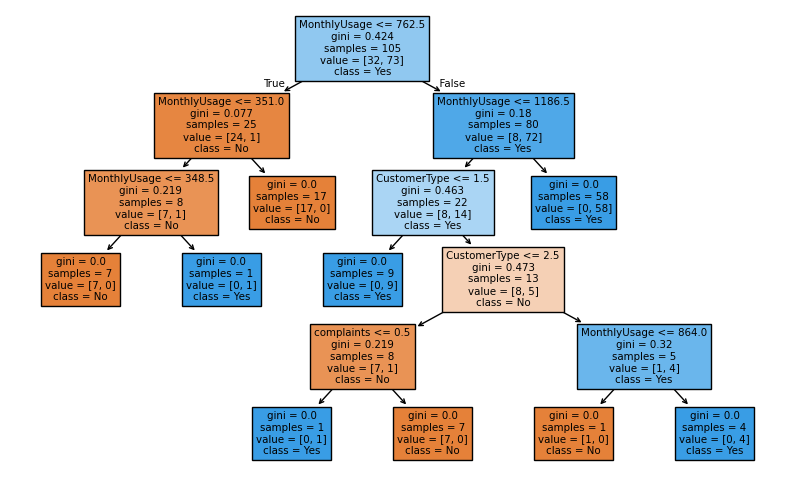

In [13]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plot_tree(model, feature_names=['MonthlyUsage','CustomerType','complaints'],class_names=['No','Yes'], filled=True)
plt.show()

In [14]:
# new_data = [[250, 1, 0]]
# print('Recharge Prediction: ', model.predict(new_data))
new_data = [[1000, 2, 3]]
print('Recharge Prediction: ', model.predict(new_data))

Recharge Prediction:  [0]


c:\Users\ITCS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [15]:
from sklearn.tree import DecisionTreeClassifier
model_1 = DecisionTreeClassifier(
    criterion='gini',
    max_depth=10,
    min_samples_leaf=7,
    max_leaf_nodes=5,
    min_impurity_decrease=0.07
)
model_1.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,7
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,5
,min_impurity_decrease,0.07
,class_weight,None


In [16]:
y_pred = model_1.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
print('\nAccuracy: ',accuracy_score(y_test,y_pred))
print('\nConfusion Matrix: \n',confusion_matrix(y_test,y_pred))


Accuracy:  0.9555555555555556

Confusion Matrix: 
 [[11  2]
 [ 0 32]]


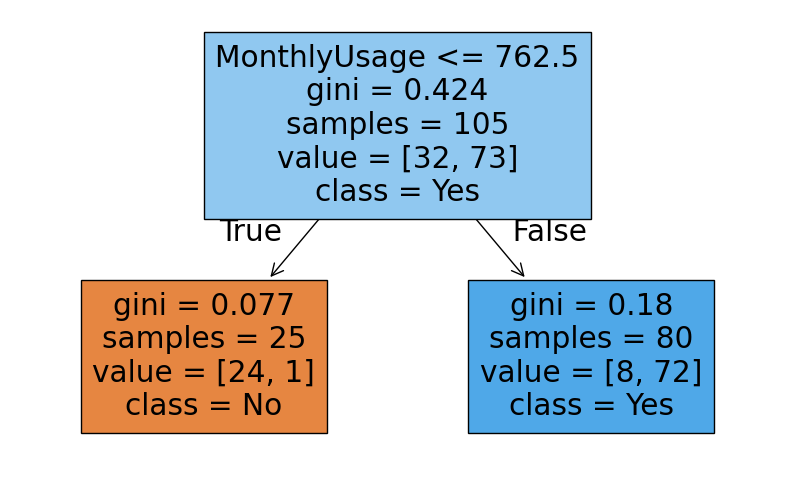

In [17]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plot_tree(model_1, feature_names=['MonthlyUsage','CustomerType','complaints'],class_names=['No','Yes'], filled=True)
plt.show()